# SchNet-QM9 Hyperparameter Grid Search

## Load trainings using pure atomic number embedding 

In [1]:
import wandb
import pandas as pd

from analysis.helper import extract_config

api = wandb.Api()
runs = api.runs(
    "modelforge_nnps/schnet_qm9E(-q)_replica",
)
print(f"Found {len(runs)} runs")
summary_list, config_list, name_list = [], [], []

Found 560 runs


In [2]:
potential_parameter = runs[0].config["potential_parameter"]

In [3]:
potential_parameter

"potential_name='SchNet' only_unique_pairs=False core_parameter=CoreParameter(number_of_radial_basis_functions=64, maximum_interaction_radius=0.49999999999999994, number_of_interaction_modules=3, number_of_filters=32, shared_interactions=True, activation_function_parameter=ActivationFunctionConfig(activation_function_name='ShiftedSoftplus', activation_function_arguments=None, activation_function=ShiftedSoftplus()), featurization=Featurization(properties_to_featurize=['atomic_number'], atomic_number=AtomicNumber(maximum_atomic_number=101, number_of_per_atom_features=64), atomic_period=AtomicPeriod(maximum_period=8, number_of_per_period_features=32), atomic_group=AtomicGroup(maximum_group=18, number_of_per_group_features=32)), predicted_properties=['per_atom_energy'], predicted_dim=[1]) postprocessing_parameter=PostProcessingParameter(properties_to_process=['per_atom_energy'], per_atom_energy=PerAtomEnergy(normalize=False, from_atom_to_system_reduction=True, keep_per_atom_property=True),

In [4]:
training_parameter = runs[0].config["training_parameter"]

In [5]:
training_parameter

"monitor='val/per_system_energy/rmse' number_of_epochs=500 remove_self_energies=True shift_center_of_mass_to_origin=False batch_size=128 lr=0.0005 plot_frequency=1 lr_scheduler=ReduceLROnPlateauConfig(scheduler_name='ReduceLROnPlateau', frequency=1, interval='epoch', monitor='val/per_system_energy/rmse', mode='min', factor=0.5, patience=10, threshold=0.1, threshold_mode='abs', cooldown=15, min_lr=1e-06, eps=1e-08) loss_parameter=LossParameter(loss_components=['per_atom_energy'], weight={'per_atom_energy': 1.0}, target_weight={'per_atom_energy': 1.0}, mixing_steps={'per_atom_energy': 1.0}) early_stopping=EarlyStopping(verbose=True, monitor='val/per_system_energy/rmse', min_delta=0.1, patience=100) splitting_strategy=SplittingStrategy(name='random_record_splitting_strategy', data_split=[0.8, 0.1, 0.1], seed=42) stochastic_weight_averaging=None experiment_logger=ExperimentLogger(logger_name='wandb', tensorboard_configuration=None, wandb_configuration=WandbConfig(save_dir='logs', project='

In [6]:
runs[0].summary

{'_runtime': 6130.438239842, '_step': 2450, '_timestamp': 1742962696.7809372, '_wandb': {'runtime': 6130}, 'epoch': 349, 'epoch_time': 18.022900104522705, 'loss/per_atom_energy/mse': 5.331758975982666, 'loss/per_atom_energy/weight': 1, 'loss/total_loss/mse': 5.331758975982666, 'lr': 9.999999974752427e-07, 'outlier_count/test/108287': 1, 'outlier_count/test/54996': 1, 'outlier_count/test/62751': 1, 'outlier_count/val/101816': 3, 'outlier_count/val/107212': 3, 'outlier_count/val/111220': 1, 'outlier_count/val/124144': 1, 'outlier_count/val/127319': 11, 'outlier_count/val/26000': 310, 'outlier_count/val/33355': 2, 'outlier_count/val/45250': 2, 'outlier_count/val/58089': 1, 'outlier_count/val/58918': 2, 'outlier_count/val/66701': 2, 'outlier_count/val/71426': 331, 'outlier_count/val/72905': 1, 'outlier_count/val/75601': 332, 'outlier_count/val/76351': 4, 'outlier_count/val/85483': 25, 'outlier_count/val/89481': 20, 'outlier_count/val/971': 2, 'test/energy_error_histogram': {'_type': 'image

In [7]:
runs[0].config

{'potential_seed': None,
 'optimizer_class': 'AdamW',
 'dataset_statistic': {'atomic_self_energies': {'C': '-99366.70745535441 kilojoule_per_mole',
   'F': '-261811.54555874597 kilojoule_per_mole',
   'H': '-1313.4668615546 kilojoule_per_mole',
   'N': '-143309.9379722722 kilojoule_per_mole',
   'O': '-197082.0671774158 kilojoule_per_mole'},
  'training_dataset_statistics': {'per_atom_energy_mean': '-409.48571973637587 kilojoule_per_mole',
   'per_atom_energy_stddev': '18.292824647215742 kilojoule_per_mole'}},
 'training_parameter': "monitor='val/per_system_energy/rmse' number_of_epochs=500 remove_self_energies=True shift_center_of_mass_to_origin=False batch_size=128 lr=0.0005 plot_frequency=1 lr_scheduler=ReduceLROnPlateauConfig(scheduler_name='ReduceLROnPlateau', frequency=1, interval='epoch', monitor='val/per_system_energy/rmse', mode='min', factor=0.5, patience=10, threshold=0.1, threshold_mode='abs', cooldown=15, min_lr=1e-06, eps=1e-08) loss_parameter=LossParameter(loss_component

In [8]:
extract_config(potential_parameter, "number_of_per_atom_features")

{'number_of_per_atom_features': 64}

In [9]:
extract_config(potential_parameter, "number_of_filters")

{'number_of_filters': 32}

In [10]:
extract_config(potential_parameter, "number_of_interaction_modules")

{'number_of_interaction_modules': 3}

In [11]:
runs[0].summary["test/per_system_energy/mae"]

6.411189556121826

In [12]:
extract_config(extract_config(training_parameter, "splitting_strategy")["splitting_strategy"], "seed")

SplittingStrategy(name='random_record_splitting_strategy', data_split=[0.8, 0.1, 0.1], seed=42)


{'seed': 42}

In [13]:
test_results = []

for run in runs:
    record = {}

    record.update({"name": run.name})

    potential_parameter = run.config["potential_parameter"]
    record.update(extract_config(potential_parameter, "number_of_per_atom_features"))
    record.update(extract_config(potential_parameter, "number_of_filters"))
    record.update(extract_config(potential_parameter, "number_of_interaction_modules"))

    record.update({
        "test/per_system_energy/mae": run.summary["test/per_system_energy/mae"],
        "test/per_system_energy/rmse": run.summary["test/per_system_energy/rmse"],
    })

    training_parameter = run.config["training_parameter"]
    record.update(
        extract_config(training_parameter, "seed")
    )

    record.update(
        {
            "atomic_number_embedding": True,
            "total_charge_embedding": False,
        }
    )

    test_results.append(record)

test_results_df = pd.DataFrame(test_results)

In [14]:
test_results_df.sort_values(by="test/per_system_energy/rmse")

,name,number_of_per_atom_features,number_of_filters,number_of_interaction_modules,test/per_system_energy/mae,test/per_system_energy/rmse,seed,atomic_number_embedding,total_charge_embedding
363,3_256_1024(45),1024,256,3,1.527891,2.806468,45,True,False
278,6_256_512(44),512,256,6,1.555241,2.835932,44,True,False
446,12_256_512(45),512,256,12,1.516618,3.000800,45,True,False
447,12_256_1024(45),1024,256,12,1.509539,3.085273,45,True,False
334,12_256_1024(44),1024,256,12,1.635997,3.134676,44,True,False
...,...,...,...,...,...,...,...,...,...
134,3_256_64(43),64,256,3,3.682238,57.594643,43,True,False
175,9_64_16(43),16,64,9,8.655968,157.097107,43,True,False
162,6_256_32(43),32,256,6,7.258186,459.094055,43,True,False
184,9_128_16(43),16,128,9,9.929444,523.791016,43,True,False


## Load trainings using atomic number and total charge embedding

## Plotting

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context("notebook")

### Dataset splitting consistency

Text(0.5, 1.0, 'Stability of dataset splitting')

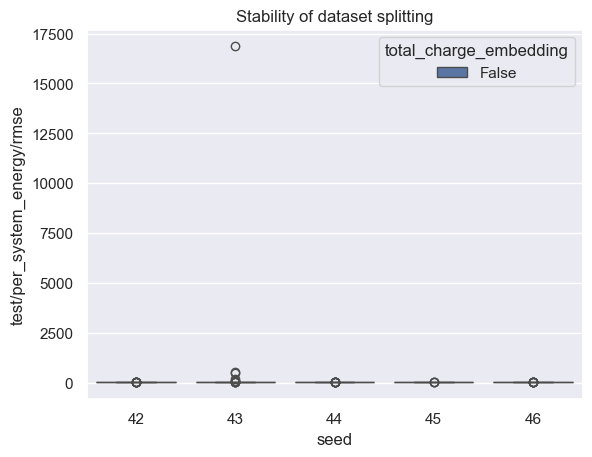

In [16]:
ax = sns.boxplot(
    data=test_results_df,
    x="seed",
    y="test/per_system_energy/rmse",
    hue="total_charge_embedding",
)
ax.set_title("Stability of dataset splitting")

Text(0.5, 1.0, 'Stability of dataset splitting')

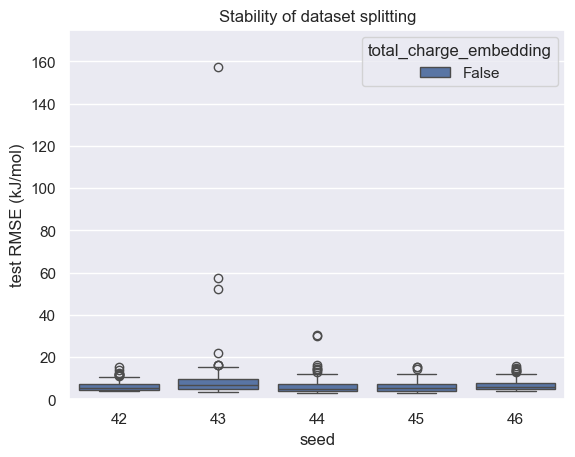

In [17]:
ax = sns.boxplot(
    data=test_results_df,
    x="seed",
    y="test/per_system_energy/rmse",
    hue="total_charge_embedding",
)

ax.set_ylabel("test RMSE (kJ/mol)")
ax.set_ylim(0, 175)
ax.set_title("Stability of dataset splitting")

In [18]:
# seed 43 causing large error outliers, ignore for now

test_results_df = test_results_df[test_results_df["seed"] != 43]

### Impact of number_of_per_atom_features

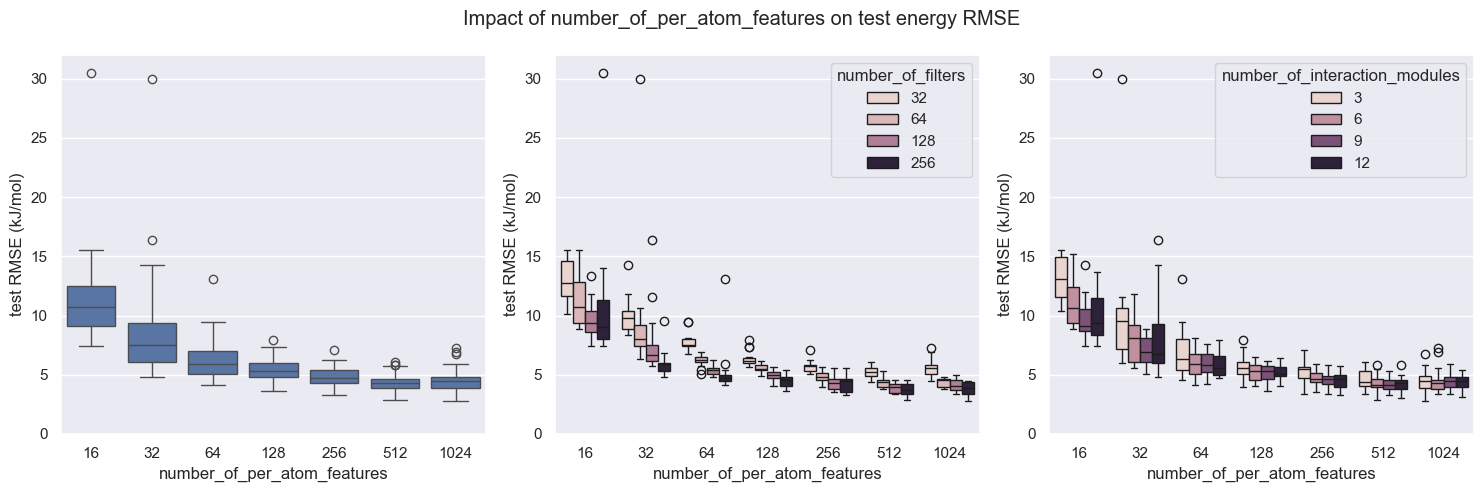

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Impact of number_of_per_atom_features on test energy RMSE")

sns.boxplot(
    ax=axes[0],
    data=test_results_df,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue=None,
)
axes[0].set_ylim(0, 32)
axes[0].set_ylabel("test RMSE (kJ/mol)")

sns.boxplot(
    ax=axes[1],
    data=test_results_df,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
axes[1].set_ylim(0, 32)
axes[1].set_ylabel("test RMSE (kJ/mol)")

sns.boxplot(
    ax=axes[2],
    data=test_results_df,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_interaction_modules",
)
axes[2].set_ylim(0, 32)
axes[2].set_ylabel("test RMSE (kJ/mol)")

fig.tight_layout()

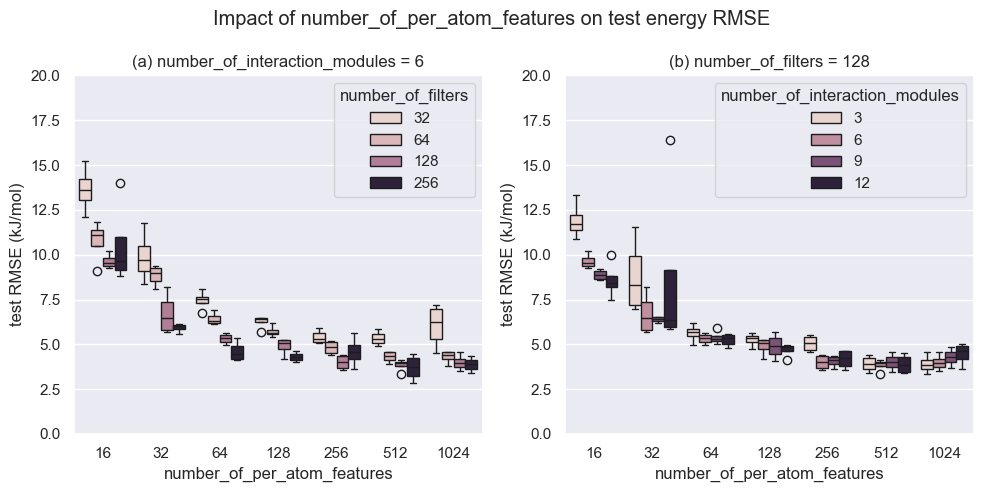

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Impact of number_of_per_atom_features on test energy RMSE")

sns.boxplot(
    ax=axes[0],
    data=test_results_df[test_results_df["number_of_interaction_modules"] == 6],
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
axes[0].set_ylim(0, 20)
axes[0].set_ylabel("test RMSE (kJ/mol)")
axes[0].set_title("(a) number_of_interaction_modules = 6")

sns.boxplot(
    ax=axes[1],
    data=test_results_df[test_results_df["number_of_filters"] == 128],
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_interaction_modules",
)
axes[1].set_ylim(0, 20)
axes[1].set_ylabel("test RMSE (kJ/mol)")
axes[1].set_title("(b) number_of_filters = 128")

fig.tight_layout()

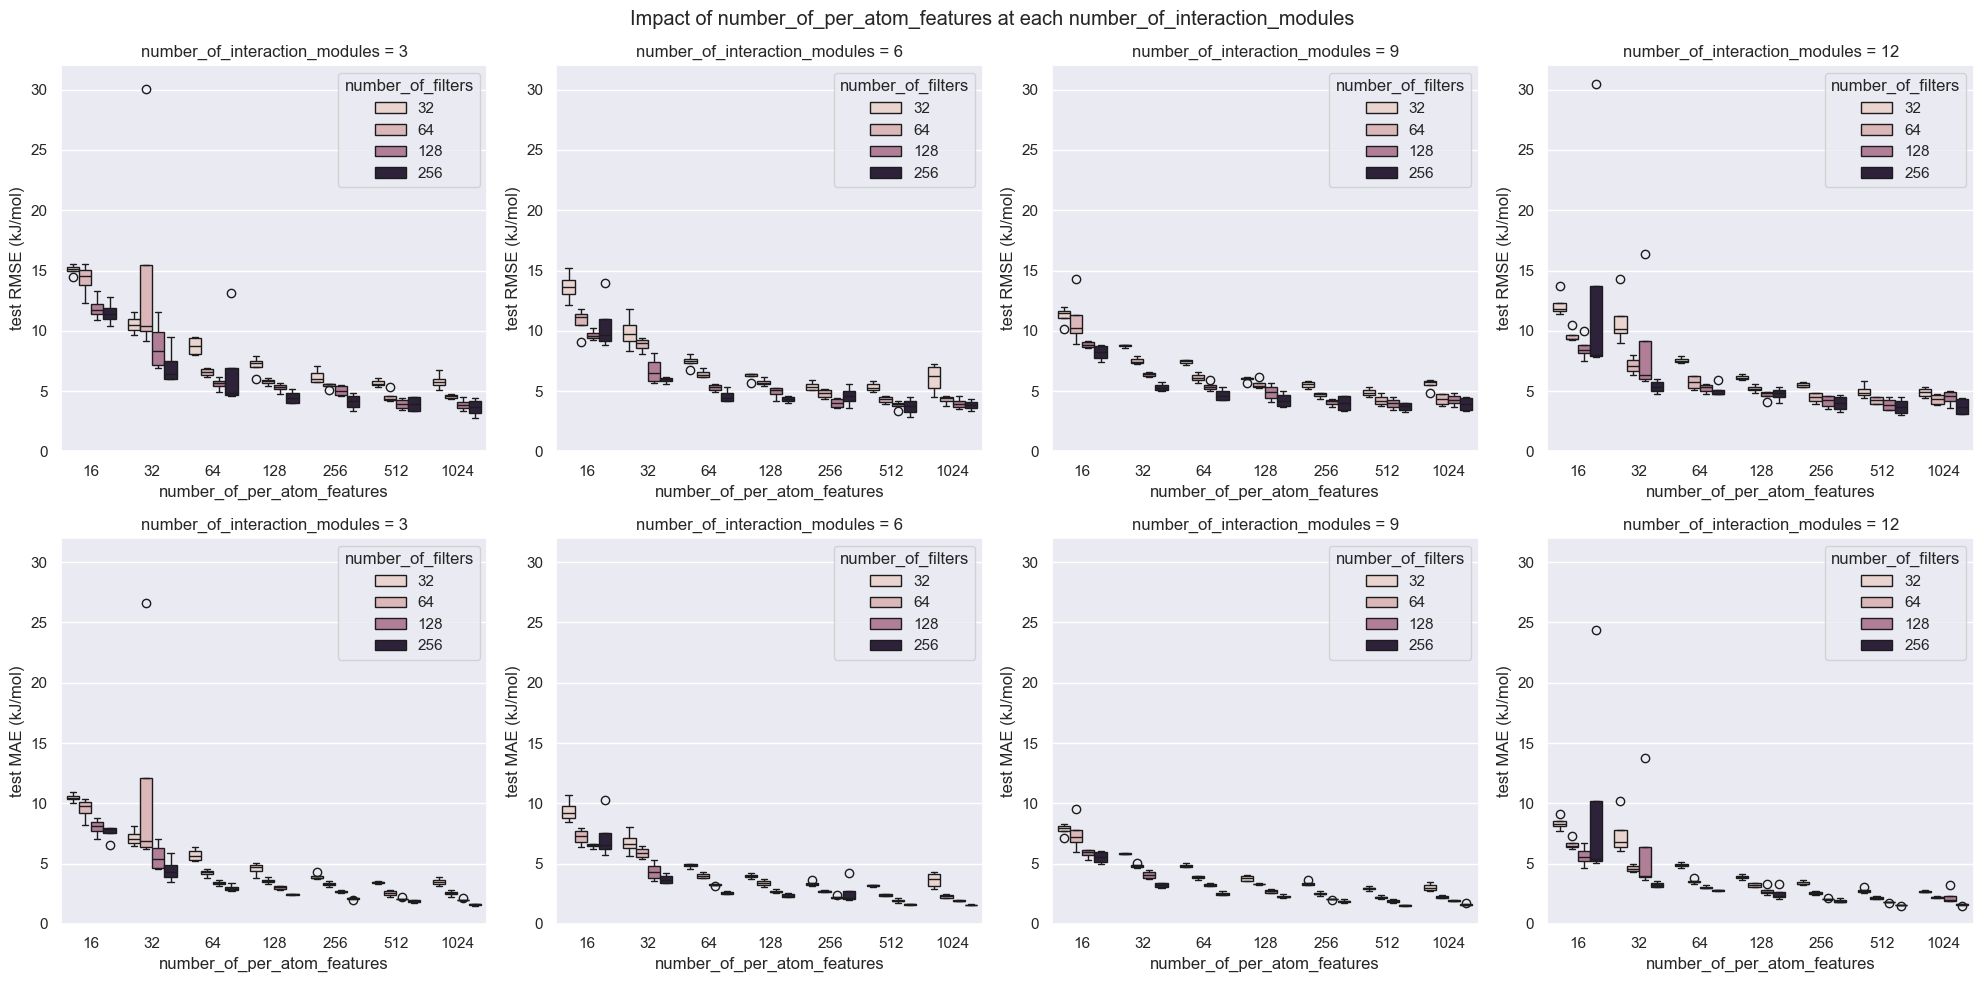

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Impact of number_of_per_atom_features at each number_of_interaction_modules")

# RMSE
filtered_results = test_results_df[test_results_df["number_of_interaction_modules"] == 3]
sns.boxplot(
    ax=axes[0, 0],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
axes[0, 0].set_ylim(0, 32)
axes[0, 0].set_ylabel("test RMSE (kJ/mol)")
axes[0, 0].set_title("number_of_interaction_modules = 3")

filtered_results = test_results_df[test_results_df["number_of_interaction_modules"] == 6]
sns.boxplot(
    ax=axes[0, 1],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
axes[0, 1].set_ylim(0, 32)
axes[0, 1].set_ylabel("test RMSE (kJ/mol)")
axes[0, 1].set_title("number_of_interaction_modules = 6")

filtered_results = test_results_df[test_results_df["number_of_interaction_modules"] == 9]
sns.boxplot(
    ax=axes[0, 2],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
axes[0, 2].set_ylim(0, 32)
axes[0, 2].set_ylabel("test RMSE (kJ/mol)")
axes[0, 2].set_title("number_of_interaction_modules = 9")

filtered_results = test_results_df[test_results_df["number_of_interaction_modules"] == 12]
sns.boxplot(
    ax=axes[0, 3],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
axes[0, 3].set_ylim(0, 32)
axes[0, 3].set_ylabel("test RMSE (kJ/mol)")
axes[0, 3].set_title("number_of_interaction_modules = 12")

# MAE
filtered_results = test_results_df[test_results_df["number_of_interaction_modules"] == 3]
sns.boxplot(
    ax=axes[1, 0],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_filters",
)
axes[1, 0].set_ylim(0, 32)
axes[1, 0].set_ylabel("test MAE (kJ/mol)")
axes[1, 0].set_title("number_of_interaction_modules = 3")

filtered_results = test_results_df[test_results_df["number_of_interaction_modules"] == 6]
sns.boxplot(
    ax=axes[1, 1],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_filters",
)
axes[1, 1].set_ylim(0, 32)
axes[1, 1].set_ylabel("test MAE (kJ/mol)")
axes[1, 1].set_title("number_of_interaction_modules = 6")

filtered_results = test_results_df[test_results_df["number_of_interaction_modules"] == 9]
sns.boxplot(
    ax=axes[1, 2],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_filters",
)
axes[1, 2].set_ylim(0, 32)
axes[1, 2].set_ylabel("test MAE (kJ/mol)")
axes[1, 2].set_title("number_of_interaction_modules = 9")

filtered_results = test_results_df[test_results_df["number_of_interaction_modules"] == 12]
sns.boxplot(
    ax=axes[1, 3],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_filters",
)
axes[1, 3].set_ylim(0, 32)
axes[1, 3].set_ylabel("test MAE (kJ/mol)")
axes[1, 3].set_title("number_of_interaction_modules = 12")

fig.tight_layout()

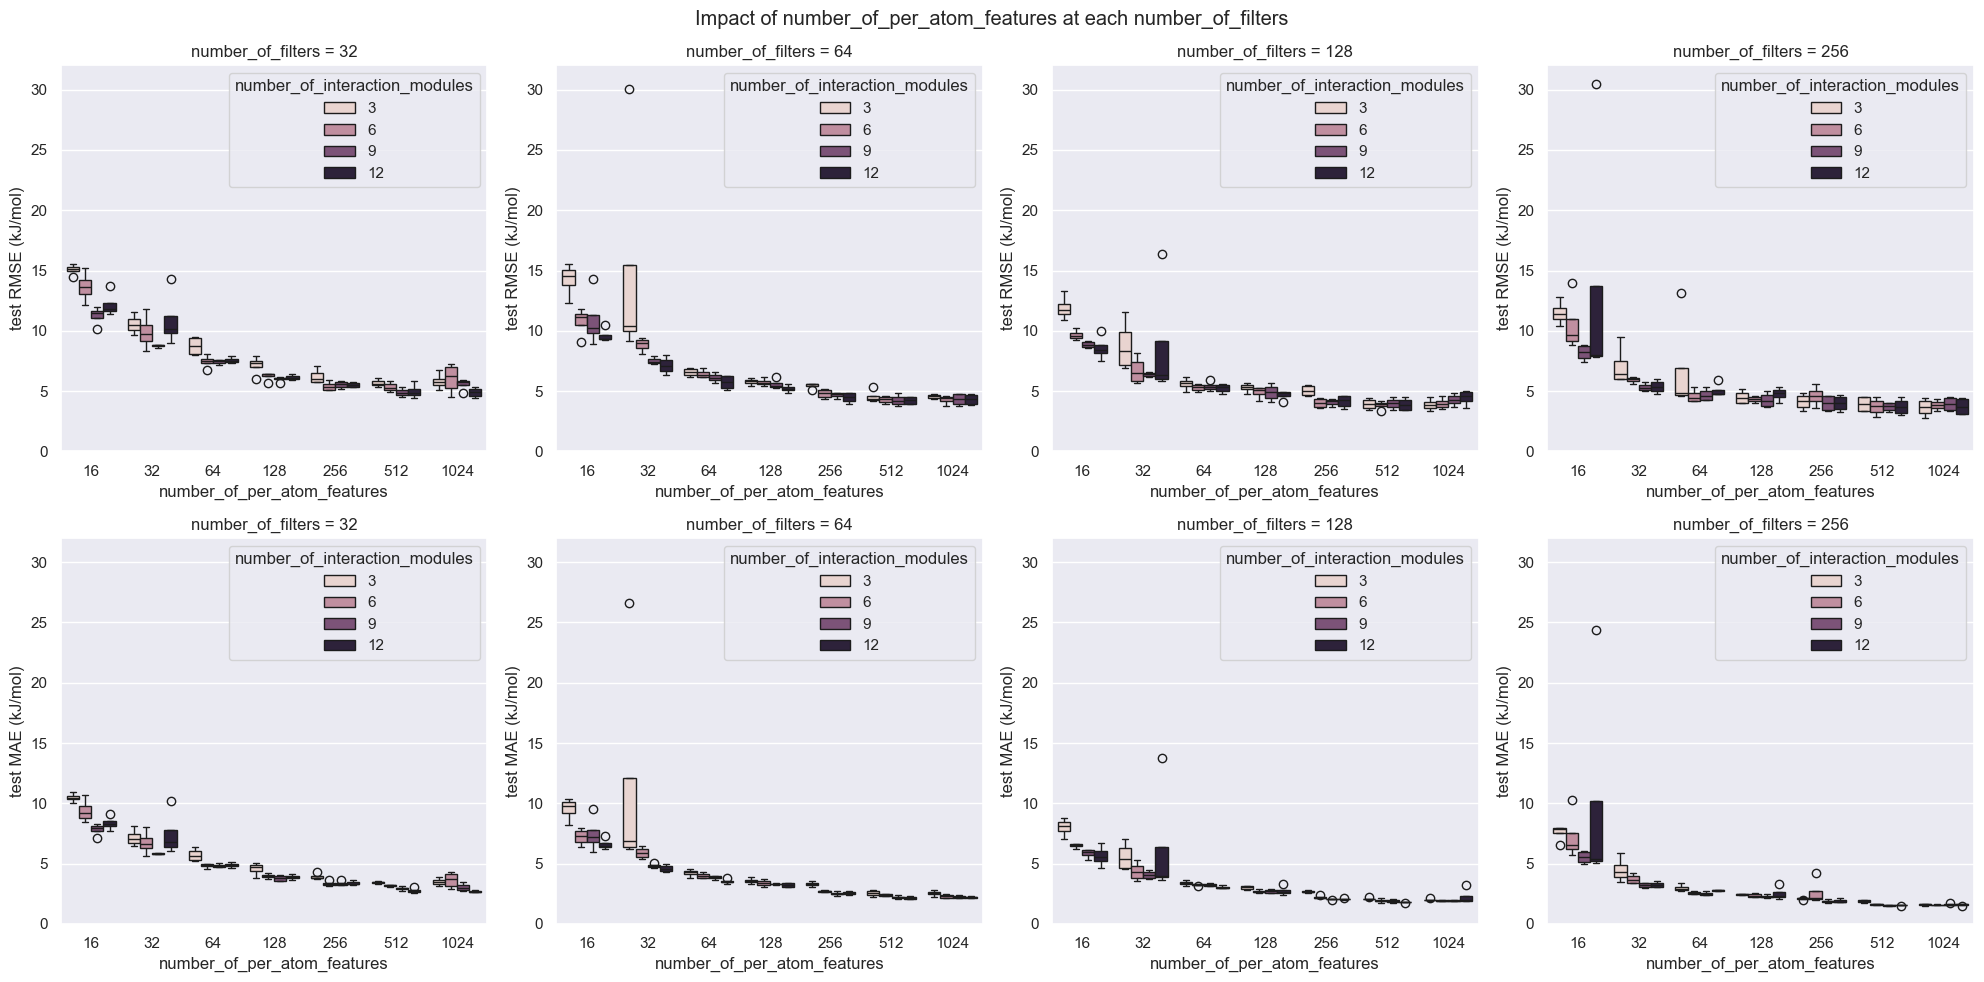

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Impact of number_of_per_atom_features at each number_of_filters")

# RMSE
filtered_results = test_results_df[test_results_df["number_of_filters"] == 32]
sns.boxplot(
    ax=axes[0, 0],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_interaction_modules",
)
axes[0, 0].set_ylim(0, 32)
axes[0, 0].set_ylabel("test RMSE (kJ/mol)")
axes[0, 0].set_title("number_of_filters = 32")

filtered_results = test_results_df[test_results_df["number_of_filters"] == 64]
sns.boxplot(
    ax=axes[0, 1],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_interaction_modules",
)
axes[0, 1].set_ylim(0, 32)
axes[0, 1].set_ylabel("test RMSE (kJ/mol)")
axes[0, 1].set_title("number_of_filters = 64")

filtered_results = test_results_df[test_results_df["number_of_filters"] == 128]
sns.boxplot(
    ax=axes[0, 2],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_interaction_modules",
)
axes[0, 2].set_ylim(0, 32)
axes[0, 2].set_ylabel("test RMSE (kJ/mol)")
axes[0, 2].set_title("number_of_filters = 128")

filtered_results = test_results_df[test_results_df["number_of_filters"] == 256]
sns.boxplot(
    ax=axes[0, 3],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_interaction_modules",
)
axes[0, 3].set_ylim(0, 32)
axes[0, 3].set_ylabel("test RMSE (kJ/mol)")
axes[0, 3].set_title("number_of_filters = 256")

# MAE
filtered_results = test_results_df[test_results_df["number_of_filters"] == 32]
sns.boxplot(
    ax=axes[1, 0],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_interaction_modules",
)
axes[1, 0].set_ylim(0, 32)
axes[1, 0].set_ylabel("test MAE (kJ/mol)")
axes[1, 0].set_title("number_of_filters = 32")

filtered_results = test_results_df[test_results_df["number_of_filters"] == 64]
sns.boxplot(
    ax=axes[1, 1],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_interaction_modules",
)
axes[1, 1].set_ylim(0, 32)
axes[1, 1].set_ylabel("test MAE (kJ/mol)")
axes[1, 1].set_title("number_of_filters = 64")

filtered_results = test_results_df[test_results_df["number_of_filters"] == 128]
sns.boxplot(
    ax=axes[1, 2],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_interaction_modules",
)
axes[1, 2].set_ylim(0, 32)
axes[1, 2].set_ylabel("test MAE (kJ/mol)")
axes[1, 2].set_title("number_of_filters = 128")

filtered_results = test_results_df[test_results_df["number_of_filters"] == 256]
sns.boxplot(
    ax=axes[1, 3],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_interaction_modules",
)
axes[1, 3].set_ylim(0, 32)
axes[1, 3].set_ylabel("test MAE (kJ/mol)")
axes[1, 3].set_title("number_of_filters = 256")

fig.tight_layout()

In [23]:
exp_results_df = test_results_df

In [24]:
exp_results_df

,name,number_of_per_atom_features,number_of_filters,number_of_interaction_modules,test/per_system_energy/mae,test/per_system_energy/rmse,seed,atomic_number_embedding,total_charge_embedding
0,3_32_64(42),64,32,3,6.411190,9.486845,42,True,False
1,3_32_128(42),128,32,3,3.829239,6.024316,42,True,False
2,3_32_32(42),32,32,3,6.810791,10.236305,42,True,False
3,3_32_16(42),16,32,3,10.446414,15.117289,42,True,False
4,3_32_256(42),256,32,3,3.791241,6.255589,42,True,False
...,...,...,...,...,...,...,...,...,...
555,12_256_32(46),32,256,12,3.322468,5.981883,46,True,False
556,12_256_128(46),128,256,12,2.275876,5.372967,46,True,False
557,12_256_256(46),256,256,12,1.879934,4.648311,46,True,False
558,12_256_512(46),512,256,12,1.587741,4.043679,46,True,False


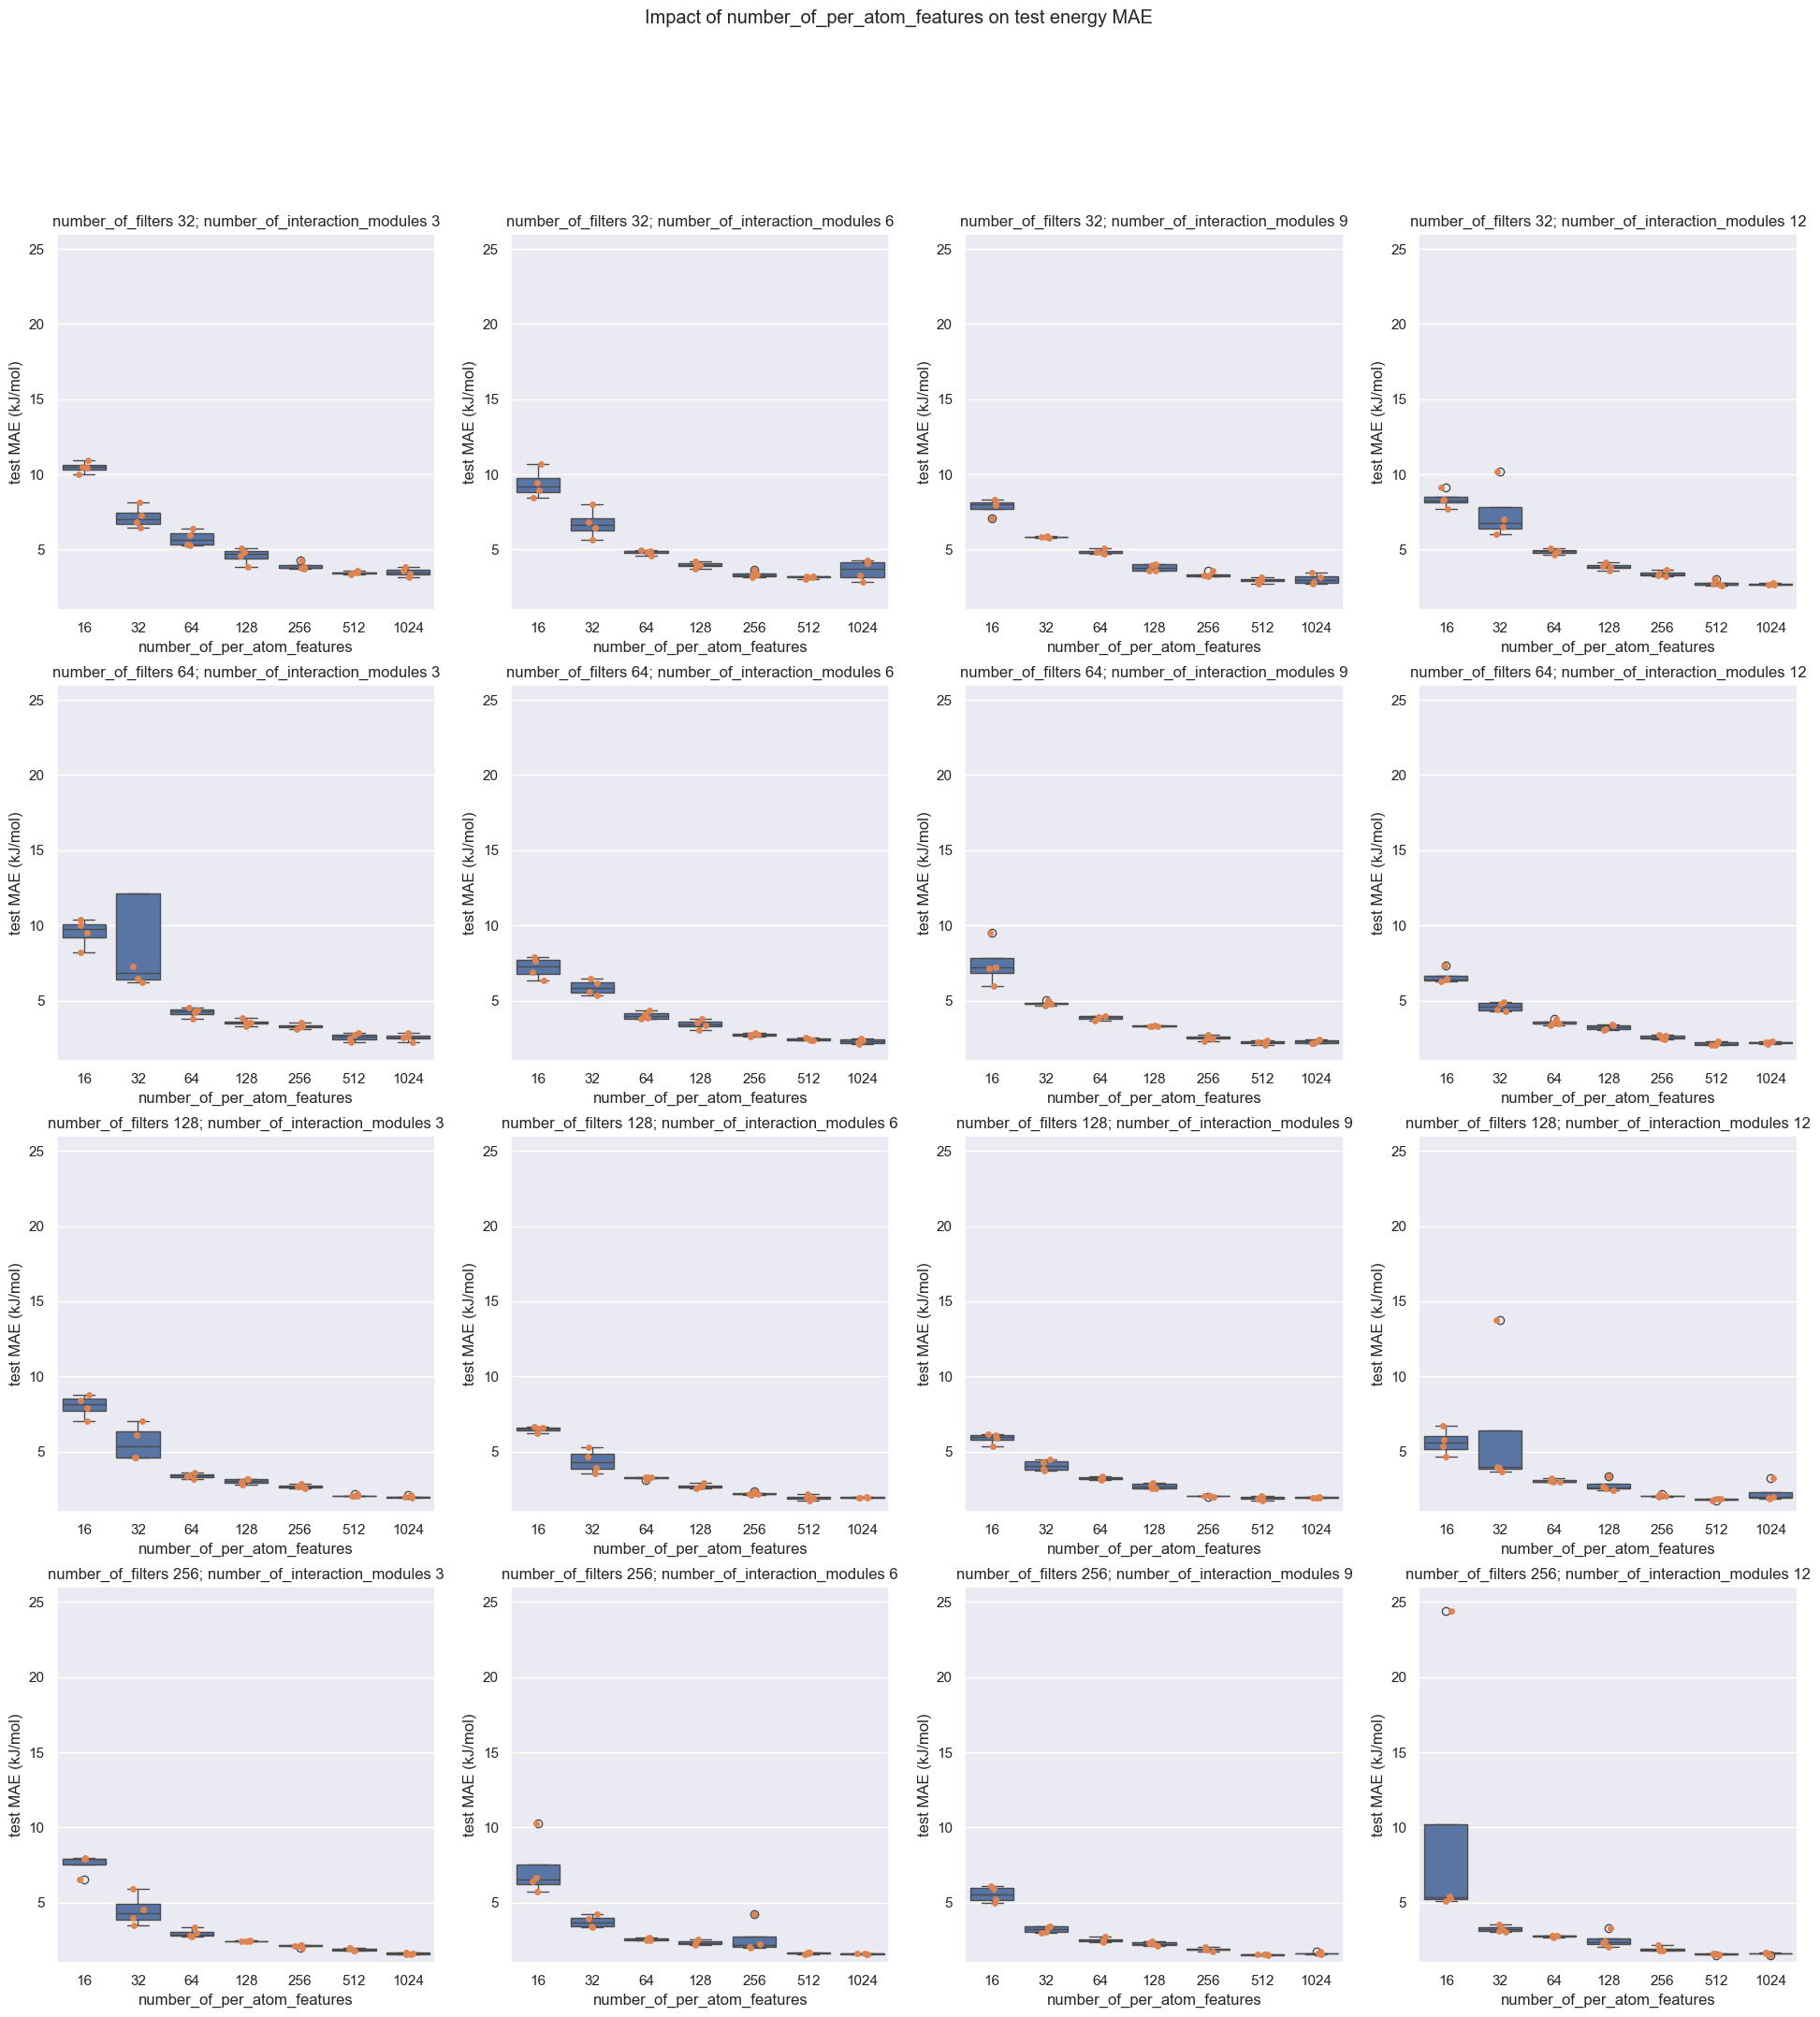

In [25]:
fig, axes = plt.subplots(4, 4, figsize=(24, 24))
fig.suptitle("Impact of number_of_per_atom_features on test energy MAE")

for i, number_of_filters in enumerate([32, 64, 128, 256]):
    for j, number_of_interaction_modules in enumerate([3, 6, 9, 12]):
        plot_results = exp_results_df[
            (exp_results_df["number_of_filters"] == number_of_filters) & \
            (exp_results_df["number_of_interaction_modules"] == number_of_interaction_modules)
        ]
        sns.boxplot(
            ax=axes[i, j],
            data=plot_results,
            x="number_of_per_atom_features",
            y="test/per_system_energy/mae",
            # hue="maximum_interaction_radius",
        )
        sns.stripplot(
            ax=axes[i, j],
            data=plot_results, 
            x="number_of_per_atom_features",
            y="test/per_system_energy/mae",
            # hue="maximum_interaction_radius",
            legend=False,
        )
        axes[i, j].set_ylim(1, 26)
        axes[i, j].set_ylabel("test MAE (kJ/mol)")
        axes[i, j].set_title(f"number_of_filters {number_of_filters}; number_of_interaction_modules {number_of_interaction_modules}")

# fig.tight_layout()

At number_of_per_atom_features >= 128, test RMSE is close to minimum.

In [26]:
test_results_df = test_results_df[test_results_df["number_of_per_atom_features"] >= 128]

### Impact of number_of_filters v.s. number_of_interaction_modules

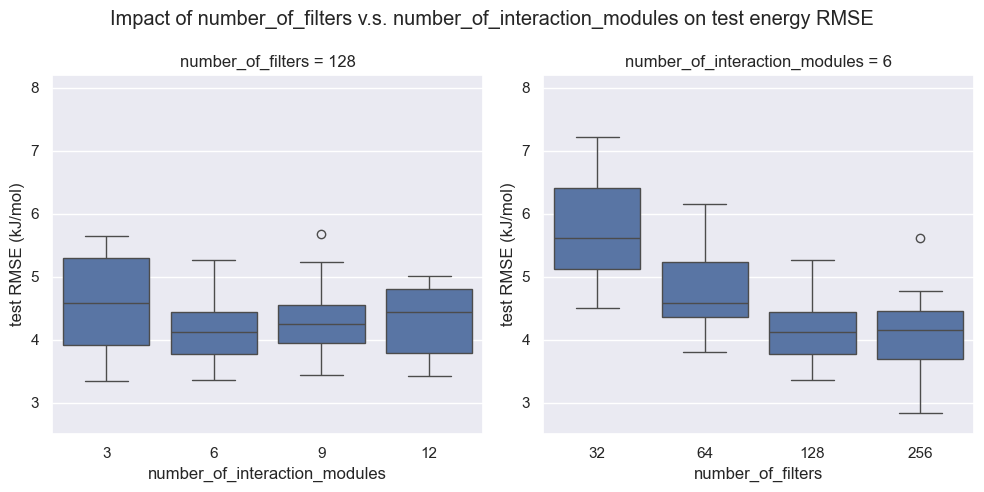

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Impact of number_of_filters v.s. number_of_interaction_modules on test energy RMSE")

sns.boxplot(
    ax=axes[0],
    data=test_results_df[test_results_df["number_of_filters"] == 128],
    x="number_of_interaction_modules",
    y="test/per_system_energy/rmse",
    # hue="number_of_filters",
)
axes[0].set_ylim(2.5, 8.2)
axes[0].set_ylabel("test RMSE (kJ/mol)")
axes[0].set_title("number_of_filters = 128")

sns.boxplot(
    ax=axes[1],
    data=test_results_df[test_results_df["number_of_interaction_modules"] == 6],
    x="number_of_filters",
    y="test/per_system_energy/rmse",
    # hue="number_of_interaction_modules",
)
axes[1].set_ylim(2.5, 8.2)
axes[1].set_ylabel("test RMSE (kJ/mol)")
axes[1].set_title("number_of_interaction_modules = 6")

fig.tight_layout()

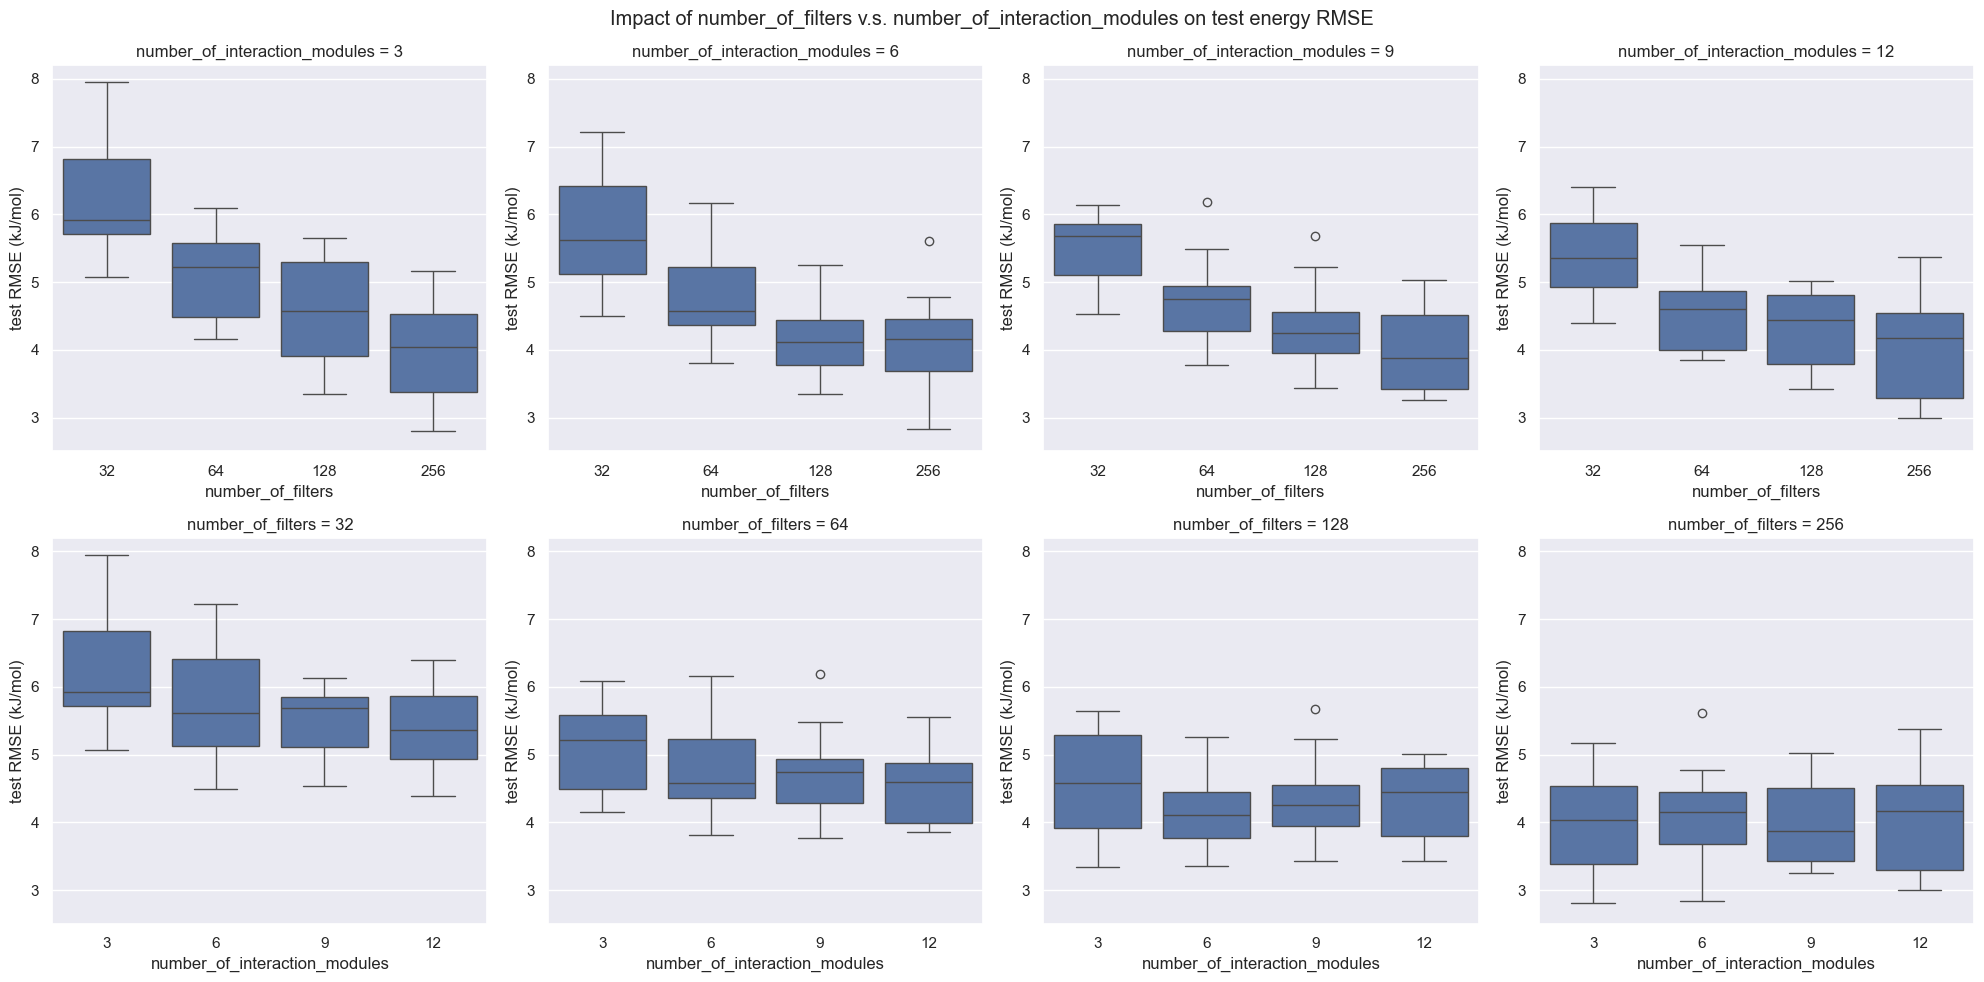

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Impact of number_of_filters v.s. number_of_interaction_modules on test energy RMSE")

# fixed number_of_interaction_modules
sns.boxplot(
    ax=axes[0, 0],
    data=test_results_df[test_results_df["number_of_interaction_modules"] == 3],
    x="number_of_filters",
    y="test/per_system_energy/rmse",
    # hue="number_of_per_atom_features",
)
axes[0, 0].set_ylim(2.5, 8.2)
axes[0, 0].set_ylabel("test RMSE (kJ/mol)")
axes[0, 0].set_title("number_of_interaction_modules = 3")

sns.boxplot(
    ax=axes[0, 1],
    data=test_results_df[test_results_df["number_of_interaction_modules"] == 6],
    x="number_of_filters",
    y="test/per_system_energy/rmse",
    # hue="number_of_per_atom_features",
)
axes[0, 1].set_ylim(2.5, 8.2)
axes[0, 1].set_ylabel("test RMSE (kJ/mol)")
axes[0, 1].set_title("number_of_interaction_modules = 6")

sns.boxplot(
    ax=axes[0, 2],
    data=test_results_df[test_results_df["number_of_interaction_modules"] == 9],
    x="number_of_filters",
    y="test/per_system_energy/rmse",
    # hue="number_of_per_atom_features",
)
axes[0, 2].set_ylim(2.5, 8.2)
axes[0, 2].set_ylabel("test RMSE (kJ/mol)")
axes[0, 2].set_title("number_of_interaction_modules = 9")

sns.boxplot(
    ax=axes[0, 3],
    data=test_results_df[test_results_df["number_of_interaction_modules"] == 12],
    x="number_of_filters",
    y="test/per_system_energy/rmse",
    # hue="number_of_per_atom_features",
)
axes[0, 3].set_ylim(2.5, 8.2)
axes[0, 3].set_ylabel("test RMSE (kJ/mol)")
axes[0, 3].set_title("number_of_interaction_modules = 12")

# fixed number_of_filters
sns.boxplot(
    ax=axes[1, 0],
    data=test_results_df[test_results_df["number_of_filters"] == 32],
    x="number_of_interaction_modules",
    y="test/per_system_energy/rmse",
    # hue="number_of_per_atom_features",
)
axes[1, 0].set_ylim(2.5, 8.2)
axes[1, 0].set_ylabel("test RMSE (kJ/mol)")
axes[1, 0].set_title("number_of_filters = 32")

sns.boxplot(
    ax=axes[1, 1],
    data=test_results_df[test_results_df["number_of_filters"] == 64],
    x="number_of_interaction_modules",
    y="test/per_system_energy/rmse",
    # hue="number_of_per_atom_features",
)
axes[1, 1].set_ylim(2.5, 8.2)
axes[1, 1].set_ylabel("test RMSE (kJ/mol)")
axes[1, 1].set_title("number_of_filters = 64")

sns.boxplot(
    ax=axes[1, 2],
    data=test_results_df[test_results_df["number_of_filters"] == 128],
    x="number_of_interaction_modules",
    y="test/per_system_energy/rmse",
    # hue="number_of_per_atom_features",
)
axes[1, 2].set_ylim(2.5, 8.2)
axes[1, 2].set_ylabel("test RMSE (kJ/mol)")
axes[1, 2].set_title("number_of_filters = 128")

sns.boxplot(
    ax=axes[1, 3],
    data=test_results_df[test_results_df["number_of_filters"] == 256],
    x="number_of_interaction_modules",
    y="test/per_system_energy/rmse",
    # hue="number_of_per_atom_features",
)
axes[1, 3].set_ylim(2.5, 8.2)
axes[1, 3].set_ylabel("test RMSE (kJ/mol)")
axes[1, 3].set_title("number_of_filters = 256")

fig.tight_layout()

### Impact of the total charge embedding

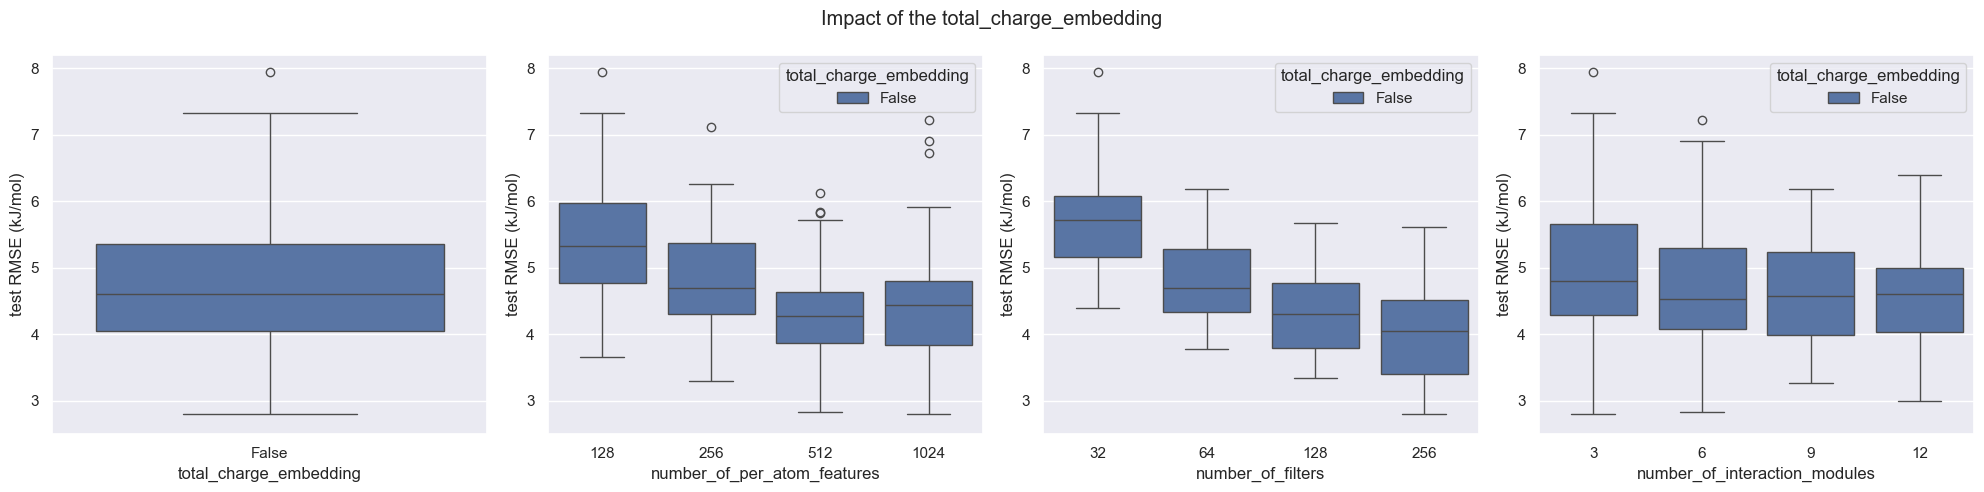

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Impact of the total_charge_embedding")
    
sns.boxplot(
    ax=axes[0],
    data=test_results_df,
    x="total_charge_embedding",
    y="test/per_system_energy/rmse",
)
axes[0].set_ylim(2.5, 8.2)
axes[0].set_ylabel("test RMSE (kJ/mol)")

sns.boxplot(
    ax=axes[1],
    data=test_results_df,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="total_charge_embedding",
)
axes[1].set_ylim(2.5, 8.2)
axes[1].set_ylabel("test RMSE (kJ/mol)")

sns.boxplot(
    ax=axes[2],
    data=test_results_df,
    x="number_of_filters",
    y="test/per_system_energy/rmse",
    hue="total_charge_embedding",
)
axes[2].set_ylim(2.5, 8.2)
axes[2].set_ylabel("test RMSE (kJ/mol)")

sns.boxplot(
    ax=axes[3],
    data=test_results_df,
    x="number_of_interaction_modules",
    y="test/per_system_energy/rmse",
    hue="total_charge_embedding",
)
axes[3].set_ylim(2.5, 8.2)
axes[3].set_ylabel("test RMSE (kJ/mol)")

fig.tight_layout()

### Compuation resource consumption

In [30]:
runs[0].history(stream="events")

,system.network.sent,system.network.recv,_wandb,_runtime,_timestamp,system.cpu.60.cpu_percent,system.cpu.52.cpu_percent,system.cpu.42.cpu_percent,system.cpu.22.cpu_percent,system.cpu.9.cpu_percent,...,system.gpu.0.memoryClock,system.gpu.0.enforcedPowerLimitWatts,system.disk./.usageGB,system.disk.out,system.disk./.usagePercent,system.disk.in,system.memory_percent,system.proc.memory.rssMB,system.proc.memory.availableMB,system.proc.memory.percent
0,7.469685e+06,932242.0,True,20.548112,1.742957e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,True,20.559953,1.742957e+09,1.923077,0.91001,0.0,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,True,60.562677,1.742957e+09,NaN,NaN,NaN,NaN,NaN,...,1512.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,True,70.559322,1.742957e+09,1.200000,0.29970,0.0,0.1998,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,True,100.569900,1.742957e+09,NaN,NaN,NaN,NaN,NaN,...,1512.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,NaN,NaN,True,5960.562154,1.742963e+09,NaN,NaN,NaN,NaN,NaN,...,1512.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,2.408906e+09,282779441.0,True,5990.549853,1.742963e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,NaN,NaN,True,6050.550678,1.742963e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.503939,1937.503906,920289.007812,0.187876
530,NaN,NaN,True,6050.563095,1.742963e+09,NaN,NaN,NaN,NaN,NaN,...,1512.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
